<a href="https://colab.research.google.com/github/VarelAntoni/DBS-Coding-Camp-2025/blob/main/Belajar_Machine_Learning_Untuk_Pemula/%5BKlasifikasi%5D_Submission_Akhir_BMLP_Muhammad_Varel_Antoni.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/dataset_clustering.csv')

In [ ]:
df.head()

,Customer_Type,Category,Unit_Price,Quantity,Discount,Total_Price,cluster
0,B2B,Soft Drinks,1.87,18.0,5.000000e-02,31.98,0
1,B2C,Juices,1.64,4.0,3.469447e-18,6.56,1
2,B2C,Soft Drinks,1.74,5.0,3.469447e-18,8.70,2
3,B2C,Juices,1.80,15.0,3.469447e-18,27.00,1
4,B2B,Water,0.98,6.0,5.000000e-02,5.59,0


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [ ]:
from sklearn.preprocessing import StandardScaler

numerical_cols = df.select_dtypes(include=np.number).columns

scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Cek hasil akhir
print(df.head())

  Customer_Type     Category  Unit_Price  Quantity  Discount  Total_Price  \
0           B2B  Soft Drinks    0.078681  0.436091  1.200786     0.461184   
1           B2C       Juices   -0.140678 -0.701112 -0.499986    -0.616968   
2           B2C  Soft Drinks   -0.045304 -0.619883 -0.499986    -0.526203   
3           B2C       Juices    0.011920  0.192404 -0.499986     0.249964   
4           B2B        Water   -0.770145 -0.538654  1.200786    -0.658109   

    cluster  
0 -1.601481  
1 -0.306217  
2  0.989048  
3 -0.306217  
4 -1.601481  


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Gunakan .loc[:, column] agar tidak terjadi SettingWithCopyWarning
for column in df.select_dtypes(include=['object']).columns:
    df.loc[:, column] = le.fit_transform(df[column])

print(df.head())

  Customer_Type Category  Unit_Price  Quantity  Discount  Total_Price  \
0             0        2    0.078681  0.436091  1.200786     0.461184   
1             1        1   -0.140678 -0.701112 -0.499986    -0.616968   
2             1        2   -0.045304 -0.619883 -0.499986    -0.526203   
3             1        1    0.011920  0.192404 -0.499986     0.249964   
4             0        3   -0.770145 -0.538654  1.200786    -0.658109   

    cluster  
0 -1.601481  
1 -0.306217  
2  0.989048  
3 -0.306217  
4 -1.601481  


In [ ]:
for column in df.select_dtypes(include=['object']).columns:
    df[column] = pd.to_numeric(df[column], errors='coerce')
    df[column] = df[column].fillna(0).astype(int)

df['cluster'] = df['cluster'].astype(int)

In [ ]:
X = df.drop(columns=['cluster'])
y = df['cluster']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Test set shape: X_test={X_test.shape}, y_test={y_test.shape}")

Training set shape: X_train=(2988, 6), y_train=(2988,)
Test set shape: X_test=(747, 6), y_test=(747,)


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [ ]:
knn_model = KNeighborsClassifier().fit(X_train, y_train)

In [ ]:
dt_model = DecisionTreeClassifier().fit(X_train, y_train)

Saya pakai KNN dan Decision Tree karena keduanya mudah digunakan untuk klasifikasi. KNN cocok untuk mengenali pola berdasarkan kemiripan data, sedangkan Decision Tree membantu membuat keputusan dengan aturan sederhana.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

In [ ]:
# Prediksi menggunakan data uji
y_pred_knn = knn_model.predict(X_test)
y_pred_dt = dt_model.predict(X_test)

In [ ]:
# Evaluasi model KNN
accuracy_knn = accuracy_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn, average='weighted')  # Gunakan 'weighted' untuk multi-class
precision_knn = precision_score(y_test, y_pred_knn, average='weighted')
recall_knn = recall_score(y_test, y_pred_knn, average='weighted')

print("Evaluasi Model KNN:")
print(f"Accuracy: {accuracy_knn}")
print(f"F1-Score: {f1_knn}")
print(f"Precision: {precision_knn}")
print(f"Recall: {recall_knn}")

cm_knn = confusion_matrix(y_test, y_pred_knn)
print("Confusion Matrix KNN:\n", cm_knn)


Evaluasi Model KNN:
Accuracy: 0.9959839357429718
F1-Score: 0.9959969556394079
Precision: 0.9960560806098645
Recall: 0.9959839357429718
Confusion Matrix KNN:
 [[164   0]
 [  3 580]]


In [ ]:
# Evaluasi model decision tree
accuracy_dt = accuracy_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt, average='weighted')
precision_dt = precision_score(y_test, y_pred_dt, average='weighted')
recall_dt = recall_score(y_test, y_pred_dt, average='weighted')

print("\nEvaluasi Model Decision Tree:")
print(f"Accuracy: {accuracy_dt}")
print(f"F1-Score: {f1_dt}")
print(f"Precision: {precision_dt}")
print(f"Recall: {recall_dt}")

cm_dt = confusion_matrix(y_test, y_pred_dt)
print("Confusion Matrix Decision Tree:\n", cm_dt)


Evaluasi Model Decision Tree:
Accuracy: 0.9946452476572959
F1-Score: 0.9946452476572959
Precision: 0.9946452476572959
Recall: 0.9946452476572959
Confusion Matrix Decision Tree:
 [[162   2]
 [  2 581]]


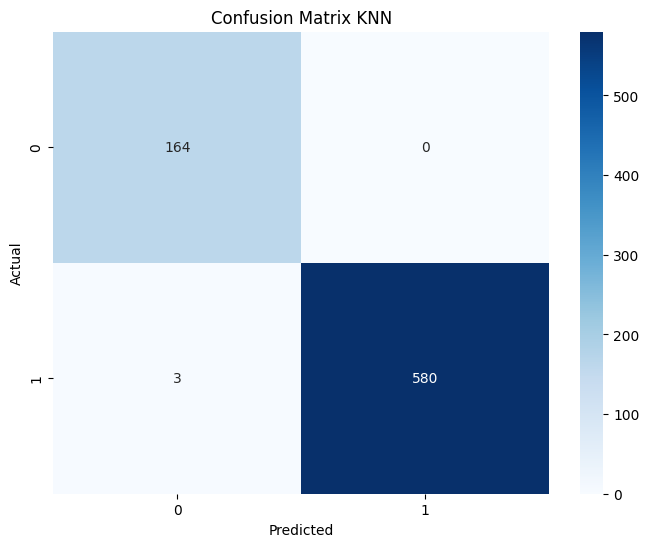

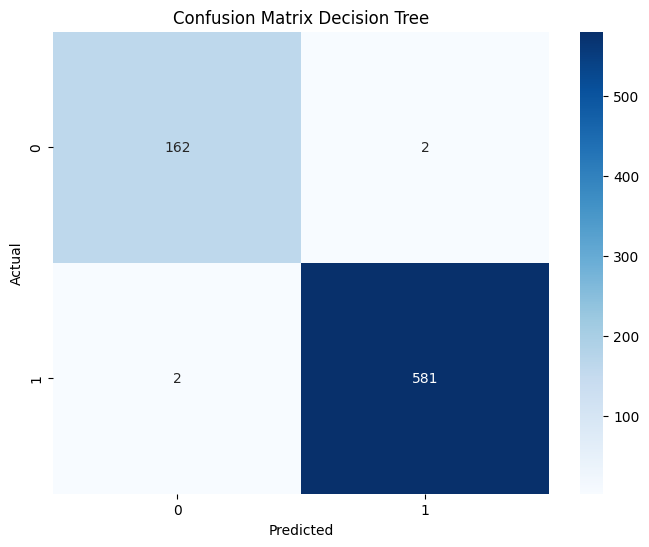

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix KNN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

1. Akurasi: Kedua algoritma memiliki akurasi yang hampir sempurna, KNN memiliki akurasi 0.995 sedankan decision tree memiliki akurasi 0.994 yang menunjukkan bahwa model dapat mengklasifikasikan data dengan baik pada set pengujian.

2. Precision, Recall, dan F1-Score: Semua metrik juga menunjukkan nilai yang sangat tinggi (lebih dari 0.99), yang mengindikasikan bahwa sedikit bahkan hampir tidak ada kesalahan klasifikasi dalam pengujian.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [ ]:
# melakukan tuning model KNN
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid_search_knn = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=param_grid_knn, cv=5, scoring='accuracy')

grid_search_knn.fit(X_train, y_train)

print("Best hyperparameters for KNN:", grid_search_knn.best_params_)
print("Best score for KNN:", grid_search_knn.best_score_)

Best hyperparameters for KNN: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Best score for KNN: 0.9986605267138368


In [ ]:
# melakukan tuning model decision tree
param_grid_dt = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_dt = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=param_grid_dt, cv=5, scoring='accuracy')

grid_search_dt.fit(X_train, y_train)

print("\nBest hyperparameters for Decision Tree:", grid_search_dt.best_params_)
print("Best score for Decision Tree:", grid_search_dt.best_score_)


Best hyperparameters for Decision Tree: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best score for Decision Tree: 0.9989949748743718


In [ ]:
best_knn_model = grid_search_knn.best_estimator_
best_dt_model = grid_search_dt.best_estimator_

y_pred_knn_tuned = best_knn_model.predict(X_test)
y_pred_dt_tuned = best_dt_model.predict(X_test)

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [ ]:
accuracy_knn_tuned = accuracy_score(y_test, y_pred_knn_tuned)
f1_knn_tuned = f1_score(y_test, y_pred_knn_tuned, average='weighted')
precision_knn_tuned = precision_score(y_test, y_pred_knn_tuned, average='weighted')
recall_knn_tuned = recall_score(y_test, y_pred_knn_tuned, average='weighted')

print("\nEvaluasi Model KNN (Tuned):")
print(f"Accuracy: {accuracy_knn_tuned}")
print(f"F1-Score: {f1_knn_tuned}")
print(f"Precision: {precision_knn_tuned}")
print(f"Recall: {recall_knn_tuned}")

accuracy_dt_tuned = accuracy_score(y_test, y_pred_dt_tuned)
f1_dt_tuned = f1_score(y_test, y_pred_dt_tuned, average='weighted')
precision_dt_tuned = precision_score(y_test, y_pred_dt_tuned, average='weighted')
recall_dt_tuned = recall_score(y_test, y_pred_dt_tuned, average='weighted')

print("\nEvaluasi Model Decision Tree (Tuned):")
print(f"Accuracy: {accuracy_dt_tuned}")
print(f"F1-Score: {f1_dt_tuned}")
print(f"Precision: {precision_dt_tuned}")
print(f"Recall: {recall_dt_tuned}")



Evaluasi Model KNN (Tuned):
Accuracy: 0.9959839357429718
F1-Score: 0.9959883155513638
Precision: 0.9959978621138725
Recall: 0.9959839357429718

Evaluasi Model Decision Tree (Tuned):
Accuracy: 0.9946452476572959
F1-Score: 0.9946452476572959
Precision: 0.9946452476572959
Recall: 0.9946452476572959


## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. evaluasi model sebelum tuning dan sesudah tuning tidak jauh berbeda, karena dari awal akurasi model hampir mendekati sempurna 0.99
2. Identifikasi kelemahan model, seperti:
  - Model kali ini yang saya lakukan ada kemungkinan mengalami overfitting. Hal ini disebabkan karena akurasi yang sempurna terdapat model.
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.
  - dapat melakukan preprocessing dengan lebih baik
  - dapat melakukan tuning hyper parameter dengan metode yang berbeda
  - tambah baris data untuk mendapatkan hasil yang lebih baik karena model belajar lebih baik dengan data yang banyak